In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('datasets/original/train.csv')

In [5]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
print(len(df))
print(len(df[df['satisfaction'] == 'satisfied']))
print(len(df[df['satisfaction'] == 'neutral or dissatisfied']))

103904
45025
58879


# Remoção de colunas "inúteis"

In [8]:
useless_columns = ['Unnamed: 0', 'id']

In [9]:
df = df.drop(axis=1, columns=useless_columns)

In [10]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Divisão por classes

In [12]:
df['satisfaction'] = df['satisfaction'].replace('satisfied', 1)
df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)

/tmp/ipykernel_31409/1830520945.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction'] = df['satisfaction'].replace('neutral or dissatisfied', 0)


In [27]:
train_set, validation_set = train_test_split(df, test_size=0.25, stratify=df['satisfaction'], random_state=42)

In [28]:
train_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
88952,Female,Loyal Customer,14,Business travel,Business,579,4,4,1,4,...,5,3,5,5,4,5,5,0,0.0,1
97144,Male,Loyal Customer,39,Business travel,Business,1671,5,5,5,5,...,5,5,5,5,3,5,4,0,0.0,1
29458,Male,disloyal Customer,25,Business travel,Business,414,2,5,2,3,...,1,4,4,5,3,5,1,5,4.0,0
69473,Male,Loyal Customer,60,Personal Travel,Business,210,2,2,2,3,...,1,1,2,1,1,1,1,0,0.0,0
80738,Female,disloyal Customer,24,Business travel,Eco Plus,247,5,0,5,3,...,2,4,5,1,5,3,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63485,Male,disloyal Customer,36,Business travel,Business,368,2,2,2,4,...,3,3,5,5,5,5,3,26,25.0,0
25837,Female,Loyal Customer,23,Business travel,Business,728,2,2,2,2,...,3,3,2,5,3,5,3,0,0.0,1
5490,Male,Loyal Customer,56,Business travel,Business,3342,4,4,4,4,...,5,5,5,5,4,5,4,1,1.0,1
32633,Male,disloyal Customer,33,Business travel,Eco,1585,2,2,2,3,...,1,4,4,3,3,3,1,26,30.0,0


In [34]:
train_set.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77928.000000,77687.000000,77928.000000
mean,39.376450,1185.576584,2.730033,3.059196,2.757571,2.978929,3.202187,3.248832,3.435659,3.358831,3.382571,3.350336,3.633700,3.305500,3.641862,3.287753,14.875667,15.268436,0.433336
std,15.125948,995.270532,1.327969,1.527266,1.399593,1.277842,1.329012,1.349096,1.319491,1.332708,1.289826,1.316917,1.178756,1.262437,1.173655,1.312656,38.480076,38.946861,0.495539
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,837.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1737.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [29]:
validation_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
39402,Male,disloyal Customer,34,Business travel,Business,522,2,2,2,2,...,1,4,3,3,3,3,3,141,125.0,0
30932,Female,Loyal Customer,46,Business travel,Eco,563,5,4,4,4,...,5,5,5,5,4,5,3,0,0.0,1
47867,Female,Loyal Customer,32,Business travel,Business,501,1,1,1,1,...,5,3,2,5,5,2,5,55,41.0,1
63212,Female,Loyal Customer,43,Business travel,Eco,201,5,3,3,3,...,5,5,5,5,5,5,5,0,0.0,1
84692,Female,Loyal Customer,10,Personal Travel,Eco,261,2,4,2,1,...,2,1,4,3,5,1,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59605,Male,Loyal Customer,17,Personal Travel,Eco,868,3,4,3,3,...,1,2,4,3,2,3,1,0,2.0,0
4608,Female,Loyal Customer,55,Business travel,Business,370,1,1,1,1,...,4,4,4,4,3,4,4,0,0.0,1
57765,Female,Loyal Customer,60,Business travel,Business,674,3,3,3,3,...,5,5,4,5,5,5,3,37,25.0,1
27811,Male,disloyal Customer,25,Business travel,Business,447,1,4,1,3,...,2,5,3,5,3,4,2,11,2.0,0


# Remoção de outliers

In [31]:
import matplotlib.pyplot as plt

In [36]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

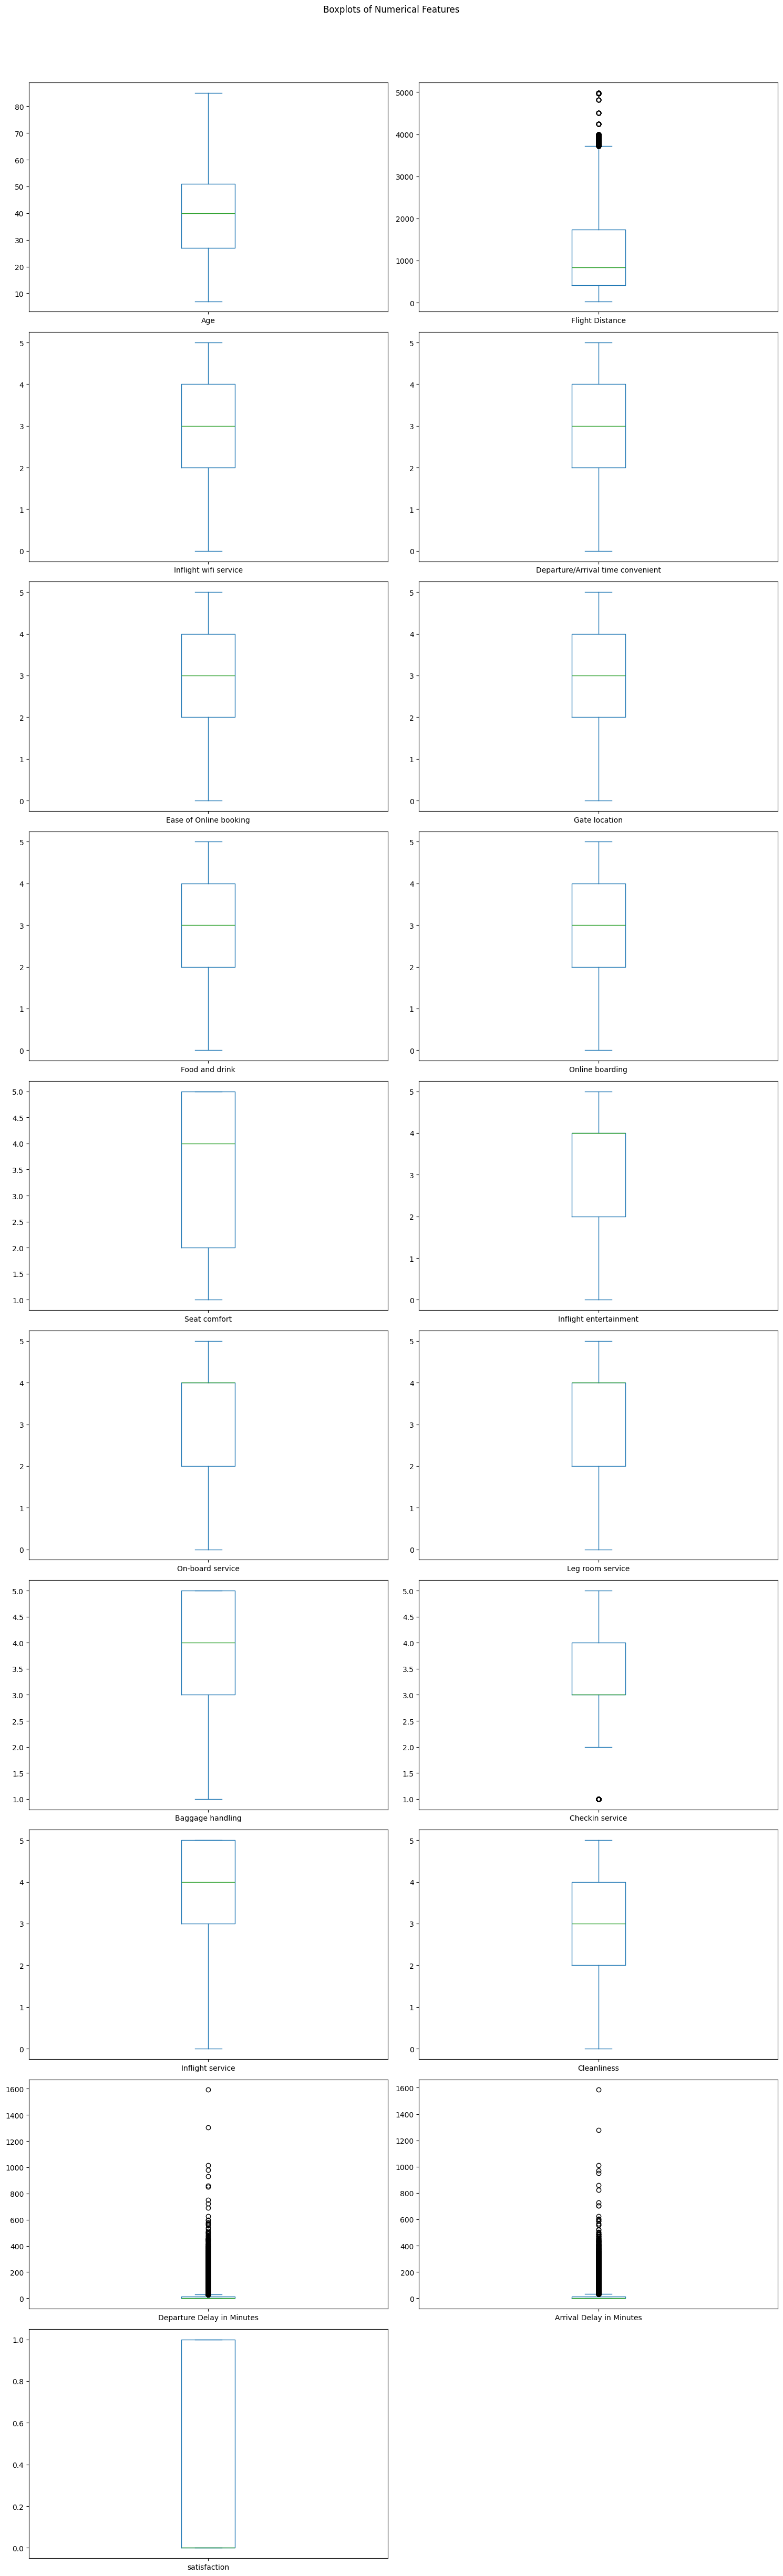

In [40]:
n_cols = len(numerical_columns)
n_rows = (n_cols + 1) // 2  # Adding 1 to ensure ceiling division

# Plot boxplots for each numerical column
train_set[numerical_columns].plot(kind='box', subplots=True, layout=(n_rows, 2), figsize=(15, n_rows * 5), title="Boxplots of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [43]:
def remove_outliers_iqr(column):
    Q1 = train_set[column].quantile(0.25)
    Q3 = train_set[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    train_set_filtered = train_set[(train_set[column] >= lower_bound) & (train_set[column] <= upper_bound)]
    return train_set_filtered

In [44]:
for c in numerical_columns:
    train_set = remove_outliers_iqr(c)

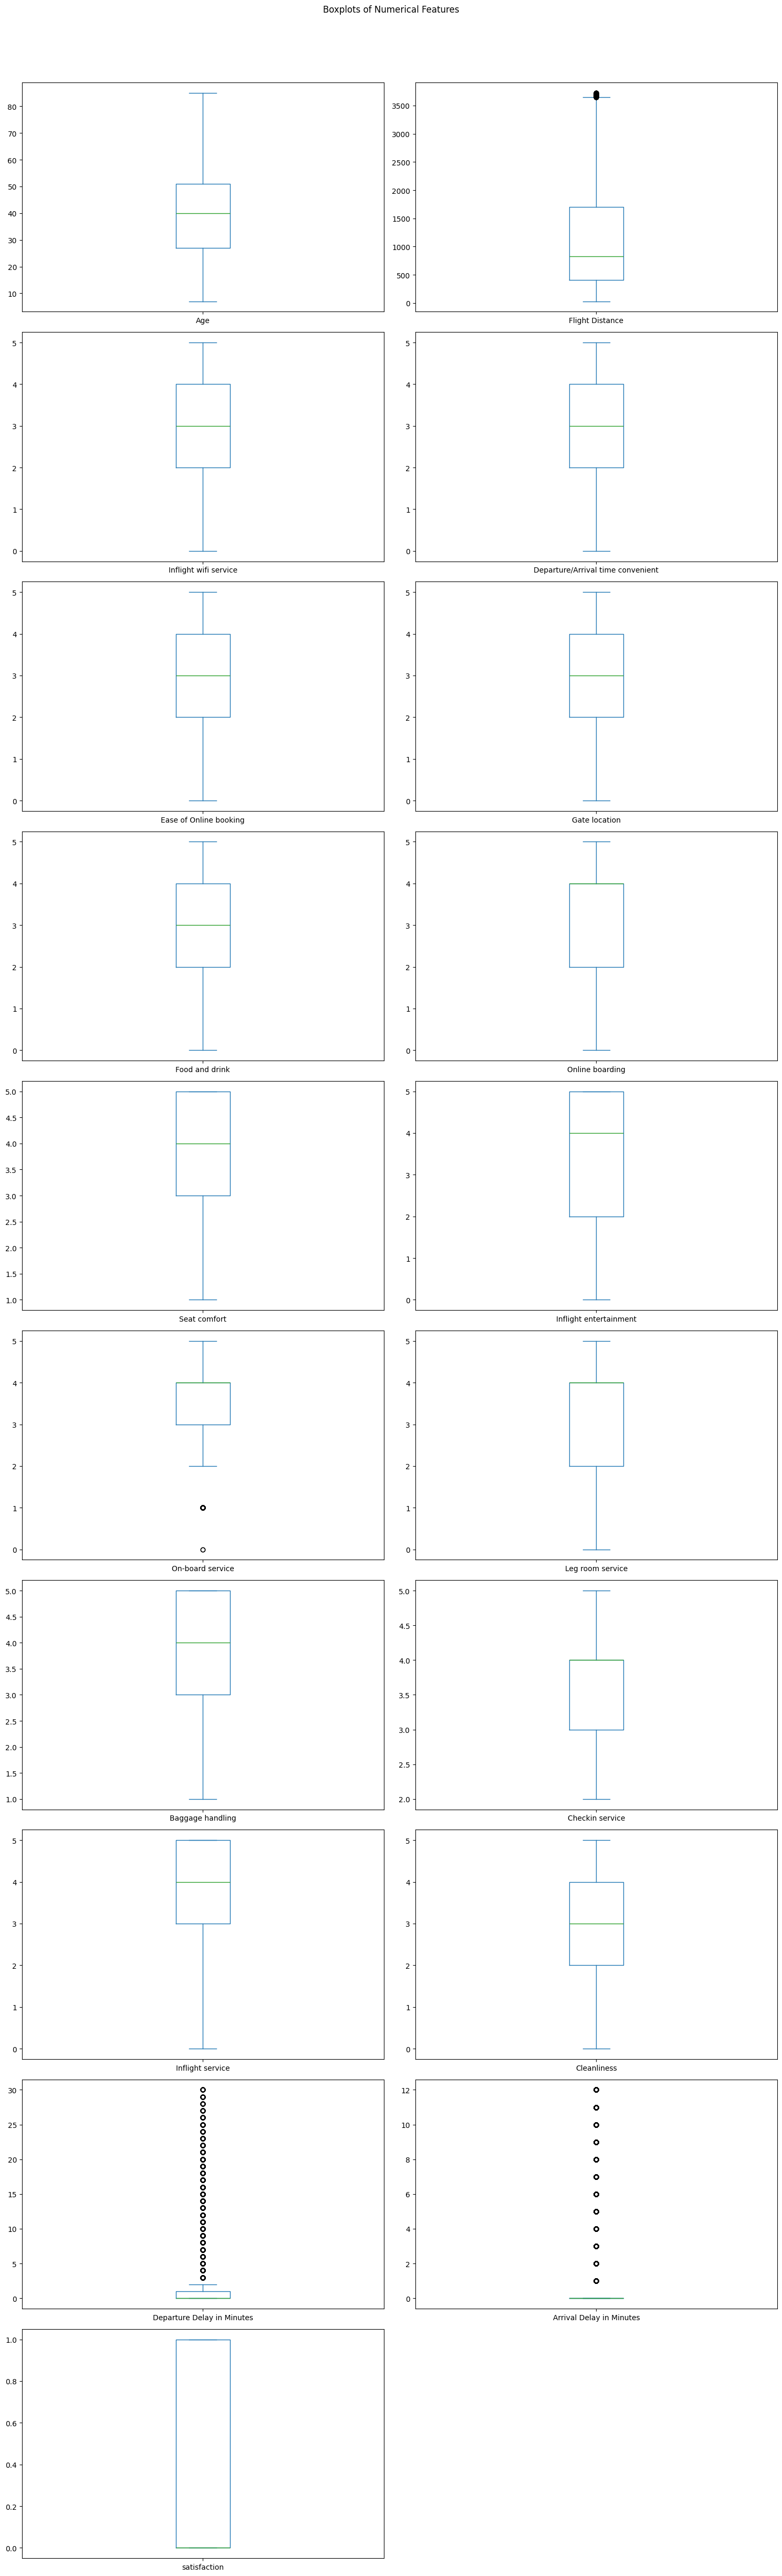

In [45]:
n_cols = len(numerical_columns)
n_rows = (n_cols + 1) // 2  # Adding 1 to ensure ceiling division

# Plot boxplots for each numerical column
train_set[numerical_columns].plot(kind='box', subplots=True, layout=(n_rows, 2), figsize=(15, n_rows * 5), title="Boxplots of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Dados faltantes

No dataset de treino não existem dados faltantes.

In [58]:
train_missing_data = train_set.columns[df.isnull().any()]
train_missing_data

Index(['Arrival Delay in Minutes'], dtype='object')

Para os dados faltantes nos conjuntos de teste e validação, iremos substituir com a mediana **do dataset de treino**.

In [59]:
validation_missing_data = validation_set.columns[df.isnull().any()]
validation_missing_data

Index(['Arrival Delay in Minutes'], dtype='object')

In [61]:
validation_set['Arrival Delay in Minutes'] = validation_set['Arrival Delay in Minutes'].fillna(train_set['Arrival Delay in Minutes'].median())

In [67]:
validation_missing_data = validation_set.columns[df.isnull().any()]
validation_missing_data

Index(['Arrival Delay in Minutes'], dtype='object')

# Variáveis categóricas

In [69]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [70]:
train_set[categorical_columns]

,Gender,Customer Type,Type of Travel,Class
88952,Female,Loyal Customer,Business travel,Business
97144,Male,Loyal Customer,Business travel,Business
29458,Male,disloyal Customer,Business travel,Business
80738,Female,disloyal Customer,Business travel,Eco Plus
47929,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
38771,Female,Loyal Customer,Business travel,Business
2817,Male,Loyal Customer,Personal Travel,Business
25837,Female,Loyal Customer,Business travel,Business
5490,Male,Loyal Customer,Business travel,Business


## Customer Type

In [73]:
train_set['Customer Type'].value_counts()

Customer Type
Loyal Customer       40366
disloyal Customer     9163
Name: count, dtype: int64

In [96]:
validation_set['Customer Type'].value_counts()

Customer Type
Loyal Customer       21314
disloyal Customer     4662
Name: count, dtype: int64

In [97]:
train_set = pd.get_dummies(train_set, columns=['Customer Type'])
validation_set = pd.get_dummies(validation_set, columns=['Customer Type'])

## Gender

In [74]:
train_set['Gender'].value_counts()

Gender
Female    25074
Male      24455
Name: count, dtype: int64

In [86]:
train_set = pd.get_dummies(train_set, columns=['Gender'])

In [88]:
validation_set['Gender'].value_counts()

Gender
Female    13191
Male      12785
Name: count, dtype: int64

In [90]:
validation_set = pd.get_dummies(validation_set, columns=['Gender'])

## Type of Travel

In [75]:
train_set['Type of Travel'].value_counts()

Type of Travel
Business travel    33694
Personal Travel    15835
Name: count, dtype: int64

In [92]:
validation_set['Type of Travel'].value_counts()

Type of Travel
Business travel    17852
Personal Travel     8124
Name: count, dtype: int64

In [93]:
train_set = pd.get_dummies(train_set, columns=['Type of Travel'])
validation_set = pd.get_dummies(validation_set, columns=['Type of Travel'])

## Class

In [77]:
train_set['Class'].value_counts()

Class
Business    12388
Eco         11757
Eco Plus     1831
Name: count, dtype: int64

In [79]:
class_replace = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}

In [80]:
train_set['Class'] = train_set['Class'].replace(class_replace)

/tmp/ipykernel_31409/940947037.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['Class'] = train_set['Class'].replace(class_replace)


In [78]:
validation_set['Class'].value_counts()

Class
Business    12388
Eco         11757
Eco Plus     1831
Name: count, dtype: int64

In [82]:
validation_set['Class'] = validation_set['Class'].replace(class_replace)

/tmp/ipykernel_31409/3649308165.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_set['Class'] = validation_set['Class'].replace(class_replace)


In [98]:
train_set = train_set.replace({True: 1, False: 0})
validation_set = validation_set.replace({True: 1, False: 0})

/tmp/ipykernel_31409/2580633377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set = train_set.replace({True: 1, False: 0})
/tmp/ipykernel_31409/2580633377.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_set = validation_set.replace({True: 1, False: 0})


# Normalização

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
for column in train_set.columns:
    if column == 'satisfaction':
        continue

    scaler = MinMaxScaler()

    train_set[column] = scaler.fit_transform(train_set[[column]])
    validation_set[column] = scaler.transform(validation_set[[column]])

In [107]:
train_set

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer
88952,0.089744,1.0,0.148429,0.8,0.8,0.2,0.8,1.0,0.8,1.00,...,1.0,0.000000,0.000000,1,1.0,0.0,1.0,0.0,1.0,0.0
97144,0.410256,1.0,0.444204,1.0,1.0,1.0,1.0,0.8,0.8,0.75,...,0.8,0.000000,0.000000,1,0.0,1.0,1.0,0.0,1.0,0.0
29458,0.230769,1.0,0.103738,0.4,1.0,0.4,0.6,0.2,0.4,0.00,...,0.2,0.166667,0.333333,0,0.0,1.0,1.0,0.0,0.0,1.0
80738,0.217949,0.5,0.058505,1.0,0.0,1.0,0.6,0.4,1.0,0.25,...,0.4,0.000000,0.000000,1,1.0,0.0,1.0,0.0,0.0,1.0
47929,0.512821,1.0,0.777086,0.2,0.2,0.2,0.2,0.4,1.0,0.75,...,1.0,0.133333,0.416667,1,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38771,0.205128,1.0,0.602113,0.6,0.6,0.6,0.6,0.6,0.6,0.50,...,0.6,0.133333,0.000000,0,1.0,0.0,1.0,0.0,1.0,0.0
2817,0.538462,1.0,0.238895,0.6,0.6,0.6,0.6,1.0,0.8,0.50,...,0.8,0.000000,0.000000,0,0.0,1.0,0.0,1.0,1.0,0.0
25837,0.205128,1.0,0.188787,0.4,0.4,0.4,0.4,0.6,0.6,0.50,...,0.6,0.000000,0.000000,1,1.0,0.0,1.0,0.0,1.0,0.0
5490,0.628205,1.0,0.896804,0.8,0.8,0.8,0.8,0.8,0.8,0.75,...,0.8,0.033333,0.083333,1,0.0,1.0,1.0,0.0,1.0,0.0


# Random Oversampling

In [111]:
from imblearn.over_sampling import RandomOverSampler

In [108]:
len(train_set[train_set['satisfaction'] == 0])

25880

In [109]:
len(train_set[train_set['satisfaction'] == 1])

23649

In [113]:
X = train_set.drop('satisfaction', axis=1)
y = train_set['satisfaction']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling on X and y together
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with resampled X and y
train_set_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_set_resampled['satisfaction'] = y_resampled

# Saving datasets

In [117]:
train_set_resampled.to_csv('datasets/processed/train.csv', index=False)
validation_set.to_csv('datasets/processed/validation.csv', index=False)